In [7]:
library(tidyverse)
library(clusterProfiler)
# library(org.Mm.eg.db)
library(enrichplot)
library(msigdbr)

# 读取基因表达数据
setwd(dir = '/home/wpy/stereoseq/20240822-Pipeline/')
gene_data <- read.csv("rank_genes_groups_1.csv")

# 创建基因列表,按照log2fc排序
gene_list <- gene_data$logfoldchanges
names(gene_list) <- gene_data$names
gene_list <- sort(gene_list, decreasing = TRUE)

# 移除NA值和重复值
gene_list <- gene_list[!is.na(gene_list)]
gene_list <- gene_list[!duplicated(gene_list)]

# 进行GSEA分析
immune_sets <- msigdbr(species = "Mus musculus", category = "C2") %>%
  dplyr::select(gs_name, gene_symbol)  # Ensure you're using gene symbols
gsea_result <- GSEA(geneList = gene_list,
                    TERM2GENE = immune_sets,
                    minGSSize = 10,
                    maxGSSize = 500,
                    pvalueCutoff = 1,
                    verbose = FALSE,
                    eps = 0) # 添加eps参数避免ties

# 查看结果
head(gsea_result@result)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HSIAO_HOUSEKEEPING_GENES,HSIAO_HOUSEKEEPING_GENES,HSIAO_HOUSEKEEPING_GENES,191,0.8088712,2.143083,7.885549e-09,3.572154e-05,3.062083e-05,473,"tags=46%, list=6%, signal=44%",Clu/Actb/Tmsb4x/B2m/Actg1/Rack1/Prdx1/S100a10/Tmsb10/Ptma/Gapdh/Ldha/Pfn1/Lgals1/Pabpc1/Dstn/Aldoa/Cox7c/Pgk1/Pgam1/Cox6c/Npm1/Tagln2/H3f3b/Anxa2/Cox4i1/Cox8a/Atp5g3/Hnrnpa1/Ybx1/Hsp90aa1/Gsto1/Itgb1/Set/Hnrnpk/Ywhaq/Gnas/Ezr/Ddb1/Ywhaz/Atp5b/Calm2/Ndufa4/Eif4g2/H2-D1/Ywhah/Serpinb6a/Atp5a1/Mgp/Hnrnpf/Ctnnb1/Pebp1/Myh9/Slc25a5/Cst3/Hmgb1/Ifitm3/Gnb1/Flna/Uqcrh/Ssr2/Lasp1/Atp5c1/Cd63/Cox6b1/Junb/Slc25a3/Ncl/Hspd1/Nono/Fkbp1a/Atox1/Fth1/Uqcrb/Marcks/Capns1/Eef1d/Nap1l1/Clic1/Tmbim6/Cox7a2/Cstb/Gpx4/Stmn1/Ube2c/Fus/Hnrnpc
CHICAS_RB1_TARGETS_CONFLUENT,CHICAS_RB1_TARGETS_CONFLUENT,CHICAS_RB1_TARGETS_CONFLUENT,369,0.7129813,1.957574,3.555318e-08,8.052796e-05,6.902931e-05,622,"tags=22%, list=8%, signal=21%",S100a6/Clu/Actb/Fn1/Col1a1/Col1a2/Pkm/S100a10/Sparc/Col3a1/Thbs1/Vcam1/Tpm1/Lmna/Bgn/Anxa1/Anxa2/Cd44/Tubb5/Cpe/Tubb4b/Serpinh1/Tuba1b/Cd9/Col5a2/Ecm1/Myh9/Ifitm3/Ahnak/Col5a1/Flna/Tuba1c/Cotl1/Nupr1/Cnn3/Tuba1a/Capg/Timp2/Cthrc1/Jpt1/Sdc4/Sh3bgrl3/Tspo/Loxl2/Sri/Acta2/Cnn2/Serpine1/Myof/Tagln/Serpinf1/Ifitm2/Palld/Nes/Plekhg4/Errfi1/Rbp1/Phgdh/Zfp36l2/Tgm2/Aldh1a3/Tes/Ccdc80/Gpx4/Rnf128/Lpp/Cyb5a/Fbn1/Mgarp/Lox/Pcolce/Twist1/Foxc2/Itga6/Cnn1/Sgms2/Tubb6/Ptgis/Tjp2/Nfe2l3
REN_ALVEOLAR_RHABDOMYOSARCOMA_DN,REN_ALVEOLAR_RHABDOMYOSARCOMA_DN,REN_ALVEOLAR_RHABDOMYOSARCOMA_DN,319,0.7293441,1.983087,1.062446e-07,1.604294e-04,1.375215e-04,563,"tags=24%, list=7%, signal=23%",S100a6/Clu/Fn1/Col1a1/Timp1/S100a10/Igfbp7/Thbs1/Anxa5/P4hb/Tagln2/Plat/Anxa1/Anxa2/Emp1/Tpm4/Gsto1/Arpc1b/Rrbp1/Calu/Col5a2/Ecm1/Tm4sf1/Actn1/Ccn2/Myh9/Cst3/Igfbp3/Col5a1/Bmp1/Ccnd1/Fstl1/Itgav/Capg/Timp2/Cttn/Rhoc/Nptn/Sh3bgrl3/Tspo/Loxl2/Thbs2/S100a13/Cnn2/Atox1/Col8a1/Tnfrsf12a/Actr2/Wls/Rab1a/Pdlim5/Serpine2/Prr13/Clic1/Adam9/Lgals3bp/Cstb/Fzd1/Cemip/Mmp2/Galnt1/Elf3/Anxa7/Lpp/Grn/Pdgfc/Arpc3/Klf6/Chmp2b/Fbn1/Lox/Iqgap1/Pcolce/Twist1/Rcn3/Pls3/Htra1
ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST,ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST,ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST,88,0.8860581,2.213656,1.436207e-07,1.626505e-04,1.394255e-04,270,"tags=50%, list=4%, signal=49%",Clu/Actb/Spp1/Fn1/Col1a1/Rack1/Pkm/Prdx1/Ldha/Sparc/Aldoa/Pgk1/Tpi1/P4hb/Vcam1/Cdh1/Lmna/Npm1/Bgn/Ran/Gsto1/Set/Ywhaq/Cfb/App/Ywhaz/Cd9/Ywhah/Cdh17/Anxa4/Ecm1/Serpinb6a/Actn1/Lgals4/Pebp1/Cst3/Gsr/Hmgb1/Ywhae/Gsta1/Capg/Timp2/Agrn/Sdc4
WANG_TUMOR_INVASIVENESS_UP,WANG_TUMOR_INVASIVENESS_UP,WANG_TUMOR_INVASIVENESS_UP,208,0.7892440,2.109423,1.842911e-07,1.669678e-04,1.431263e-04,662,"tags=36%, list=9%, signal=33%",S100a6/Fn1/Actg1/Plac8/Col1a2/Pkm/Tmsb10/Gapdh/Pabpc1/Cox7c/Krt19/S100a14/Tpm1/Npm1/H3f3b/Anxa2/Cox4i1/Cox8a/Hnrnpab/Tubb5/Ybx1/Tubb4b/Gnas/Ezr/Atp5k/Atp1a1/Eif4g2/Tuba1b/Hnrnpa2b1/Hnrnpu/Hspa5/Atp5a1/Hmgb2/Ifitm3/Ccnd1/Cd63/Prdx5/Hspe1/Pcbp1/Ywhag/Dbi/Stat1/Ncl/Hspd1/Nfe2l2/Hdlbp/Cnn2/Ifitm2/Cks1b/Marcks/Raly/Nap1l1/Cox7a2/Tes/Srsf3/Hmgcs1/Anxa7/Cald1/Crabp2/Arpc3/Lamb1/Eif3b/Hsp90b1/Ifitm1/Eno1/Tubb6/Ezh2/Tjp2/Tkt/B4galt5/Srsf7/Tardbp/Egln1/Nhp2
GNATENKO_PLATELET_SIGNATURE,GNATENKO_PLATELET_SIGNATURE,GNATENKO_PLATELET_SIGNATURE,28,0.9474313,2.191884,4.321326e-07,3.262601e-04,2.796732e-04,234,"tags=50%, list=3%, signal=49%",Clu/Actb/Tmsb4x/B2m/Pkm/Ptma/Sparc/Myl6/Tagln2/Gnas/Myl12a/Ywhah/Flna/Gpx1


In [5]:
# 使用grep筛选包含特定关键词的通路
filtered_results <- gsea_result
filtered_results@result <- gsea_result@result %>%
  filter(grepl("KEGG_T", Description, ignore.case = TRUE))
filtered_results@result

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_TIGHT_JUNCTION,KEGG_TIGHT_JUNCTION,KEGG_TIGHT_JUNCTION,119,0.6670945,1.5348314,0.0333413,0.3412097,0.3157170,683,"tags=17%, list=4%, signal=16%",Actb/Actg1/Myl7/Ppp2r2b/Cldn11/Myl12a/Actn1/Ctnnb1/Myh9/Ctnna1/Ybx3/Cldn6/Cldn7/Cldn2/Cttn/Cdk4/Cldn4/Myl12b/F11r/Nras
KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY,KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY,KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY,79,0.6150071,1.3517809,0.1204433,0.5789808,0.5357235,589,"tags=8%, list=3%, signal=7%",Spp1/Tlr5/Mapk10/Cxcl9/Cd14/Stat1
KEGG_TYPE_II_DIABETES_MELLITUS,KEGG_TYPE_II_DIABETES_MELLITUS,KEGG_TYPE_II_DIABETES_MELLITUS,41,0.5222387,1.0399045,0.3843416,0.7786466,0.7204717,253,"tags=7%, list=1%, signal=7%",Pkm/Cacna1g/Mapk10
KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM,KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM,KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM,10,-0.7720958,-1.0802115,0.4750499,0.8226558,0.7611929,1117,"tags=30%, list=6%, signal=28%",Ggt5/Cdo1/Ggt1
KEGG_TASTE_TRANSDUCTION,KEGG_TASTE_TRANSDUCTION,KEGG_TASTE_TRANSDUCTION,44,0.4485955,0.9079415,0.5543478,0.8667357,0.8019795,1358,"tags=11%, list=7%, signal=11%",Gnb3/Gnas/Gnb1/Cacna1b/Itpr3
KEGG_TRYPTOPHAN_METABOLISM,KEGG_TRYPTOPHAN_METABOLISM,KEGG_TRYPTOPHAN_METABOLISM,37,0.4571127,0.9003670,0.5865385,0.8854166,0.8192647,228,"tags=5%, list=1%, signal=5%",Tph1/Acmsd
KEGG_THYROID_CANCER,KEGG_THYROID_CANCER,KEGG_THYROID_CANCER,21,0.4410304,0.7936999,0.7037975,0.9483248,0.8774728,1626,"tags=33%, list=9%, signal=30%",Cdh1/Ctnnb1/Ccnd1/Nras/Myc/Mapk3/Pax8
KEGG_TYPE_I_DIABETES_MELLITUS,KEGG_TYPE_I_DIABETES_MELLITUS,KEGG_TYPE_I_DIABETES_MELLITUS,38,-0.4846469,-0.8230576,0.7457386,0.9742620,0.9014722,1040,"tags=16%, list=6%, signal=15%",Fas/H2-M2/H2-Eb1/H2-Ab1/H2-Aa/Il12a
KEGG_TGF_BETA_SIGNALING_PATHWAY,KEGG_TGF_BETA_SIGNALING_PATHWAY,KEGG_TGF_BETA_SIGNALING_PATHWAY,73,0.3872024,0.8449798,0.7801047,0.9872836,0.9135209,2603,"tags=34%, list=14%, signal=29%",Pitx2/Thbs1/Id2/Thbs2/Gdf6/Dcn/Inhba/Comp/Bmp8a/Tfdp1/Bmp2/Myc/Tgfb3/Thbs4/Mapk3/Bmpr1a/Ltbp1/Cdkn2b/Acvr1/Smad3/E2f4/Id1/Smurf1/Sp1/Smad4


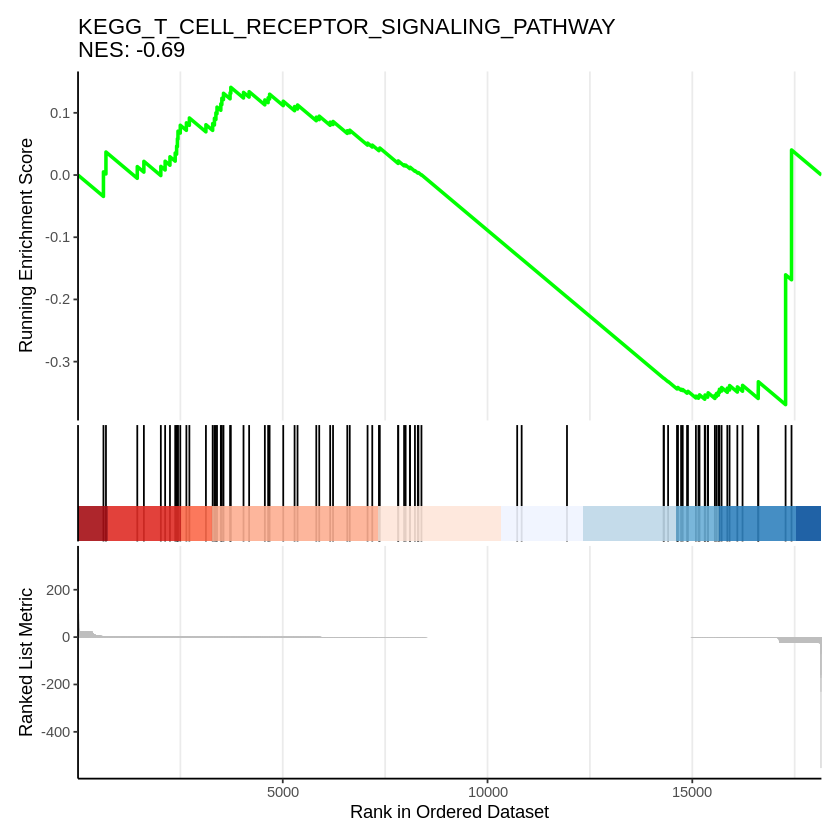

In [6]:
# 找到L2FC最大的pathway
max_l2fc_pathway <- filtered_results@result[filtered_results$Description == 'KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY', ]

# 找到L2FC最小的pathway
min_l2fc_pathway <- filtered_results@result[which.min(filtered_results$NES), ]

# 绘制L2FC最大的pathway的GSEA图
p1 <- gseaplot2(
  filtered_results,
  geneSetID = max_l2fc_pathway$ID,
  title = paste(max_l2fc_pathway$Description, "\nNES:", round(max_l2fc_pathway$NES, 2)),
  color = "green"
)
print(p1)
ggsave("./enrichment_t_cell.pdf", plot = p1, width = 7, height = 4)

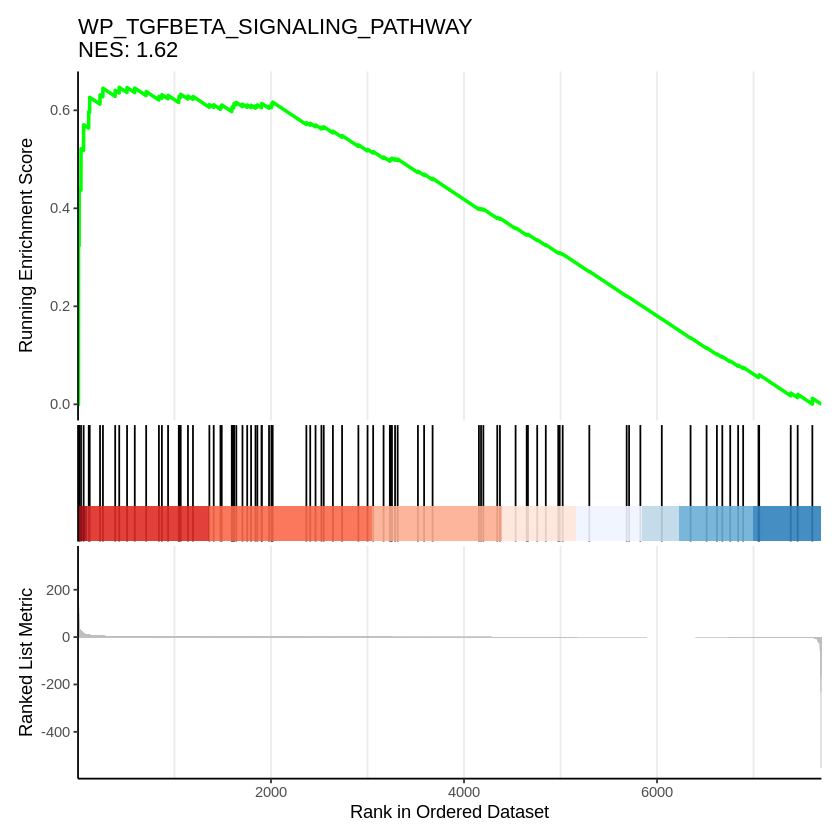

In [20]:
# 找到L2FC最大的pathway
max_l2fc_pathway <- filtered_results@result[filtered_results$Description == 'WP_TGFBETA_SIGNALING_PATHWAY', ]

# 找到L2FC最小的pathway
min_l2fc_pathway <- filtered_results@result[which.min(filtered_results$NES), ]

# 绘制L2FC最大的pathway的GSEA图
p1 <- gseaplot2(
  filtered_results,
  geneSetID = max_l2fc_pathway$ID,
  title = paste(max_l2fc_pathway$Description, "\nNES:", round(max_l2fc_pathway$NES, 2)),
  color = "green"
)
print(p1)
ggsave("./enrichment_tgfb_signaling.pdf", plot = p1, width = 7, height = 4)

In [22]:
# 使用grep筛选包含特定关键词的通路
filtered_results <- gsea_result
filtered_results@result <- gsea_result@result %>%
  filter(grepl("FIBRO", Description, ignore.case = TRUE))
filtered_results@result

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST,ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST,ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST,88,0.8860581,2.212176,8.280755e-08,0.0001530557,0.0001308807,270,"tags=50%, list=4%, signal=49%",Clu/Actb/Spp1/Fn1/Col1a1/Rack1/Pkm/Prdx1/Ldha/Sparc/Aldoa/Pgk1/Tpi1/P4hb/Vcam1/Cdh1/Lmna/Npm1/Bgn/Ran/Gsto1/Set/Ywhaq/Cfb/App/Ywhaz/Cd9/Ywhah/Cdh17/Anxa4/Ecm1/Serpinb6a/Actn1/Lgals4/Pebp1/Cst3/Gsr/Hmgb1/Ywhae/Gsta1/Capg/Timp2/Agrn/Sdc4
VANHARANTA_UTERINE_FIBROID_UP,VANHARANTA_UTERINE_FIBROID_UP,VANHARANTA_UTERINE_FIBROID_UP,31,0.8239487,1.927158,3.249852e-03,0.1617783224,0.1383395438,312,"tags=23%, list=4%, signal=22%",Fn1/Col1a1/Col3a1/Col5a2/Ccnd1/Sox4/Loxl2
MISHRA_CARCINOMA_ASSOCIATED_FIBROBLAST_DN,MISHRA_CARCINOMA_ASSOCIATED_FIBROBLAST_DN,MISHRA_CARCINOMA_ASSOCIATED_FIBROBLAST_DN,21,0.8817366,1.984097,5.598409e-03,0.1835636063,0.1569685305,214,"tags=38%, list=3%, signal=37%",Krt8/Krt14/Krt18/Krt19/Spint2/Cd24a/Krt7/Id2
HINATA_NFKB_TARGETS_FIBROBLAST_UP,HINATA_NFKB_TARGETS_FIBROBLAST_UP,HINATA_NFKB_TARGETS_FIBROBLAST_UP,53,0.6624152,1.602364,5.131265e-02,0.2674944140,0.2287392689,370,"tags=15%, list=5%, signal=14%",Fn1/Gsto1/Krt7/Cd9/Cxcl5/Hdgf/Serpine1/Litaf
WP_OVERVIEW_OF_PROINFLAMMATORY_AND_PROFIBROTIC_MEDIATORS,WP_OVERVIEW_OF_PROINFLAMMATORY_AND_PROFIBROTIC_MEDIATORS,WP_OVERVIEW_OF_PROINFLAMMATORY_AND_PROFIBROTIC_MEDIATORS,48,0.6590377,1.594084,5.392732e-02,0.2690822691,0.2300970722,566,"tags=15%, list=7%, signal=14%",Spp1/Cxcl5/Cxcl9/Cxcl16/Il24/Ccl24/Il6
REACTOME_DEFECTIVE_CFTR_CAUSES_CYSTIC_FIBROSIS,REACTOME_DEFECTIVE_CFTR_CAUSES_CYSTIC_FIBROSIS,REACTOME_DEFECTIVE_CFTR_CAUSES_CYSTIC_FIBROSIS,11,0.6934825,1.436331,1.184041e-01,0.3636457568,0.3109600058,675,"tags=27%, list=9%, signal=25%",Sem1/Psmb8/Psmb10
WP_LUNG_FIBROSIS,WP_LUNG_FIBROSIS,WP_LUNG_FIBROSIS,38,-0.7384851,-1.790752,1.192408e-01,0.3647271646,0.3118847370,7,"tags=8%, list=0%, signal=8%",Atp11a/Sftpa1/Sftpc
VANHARANTA_UTERINE_FIBROID_WITH_7Q_DELETION_DN,VANHARANTA_UTERINE_FIBROID_WITH_7Q_DELETION_DN,VANHARANTA_UTERINE_FIBROID_WITH_7Q_DELETION_DN,15,-0.7137259,-1.757482,1.256740e-01,0.3745577195,0.3202910208,22,"tags=20%, list=0%, signal=20%",Pde8a/Pink1/Akap6
MISHRA_CARCINOMA_ASSOCIATED_FIBROBLAST_UP,MISHRA_CARCINOMA_ASSOCIATED_FIBROBLAST_UP,MISHRA_CARCINOMA_ASSOCIATED_FIBROBLAST_UP,20,0.5768007,1.288705,1.997579e-01,0.4424954267,0.3783857721,574,"tags=20%, list=7%, signal=19%",Tnc/Fxyd3/Cthrc1/Krt17


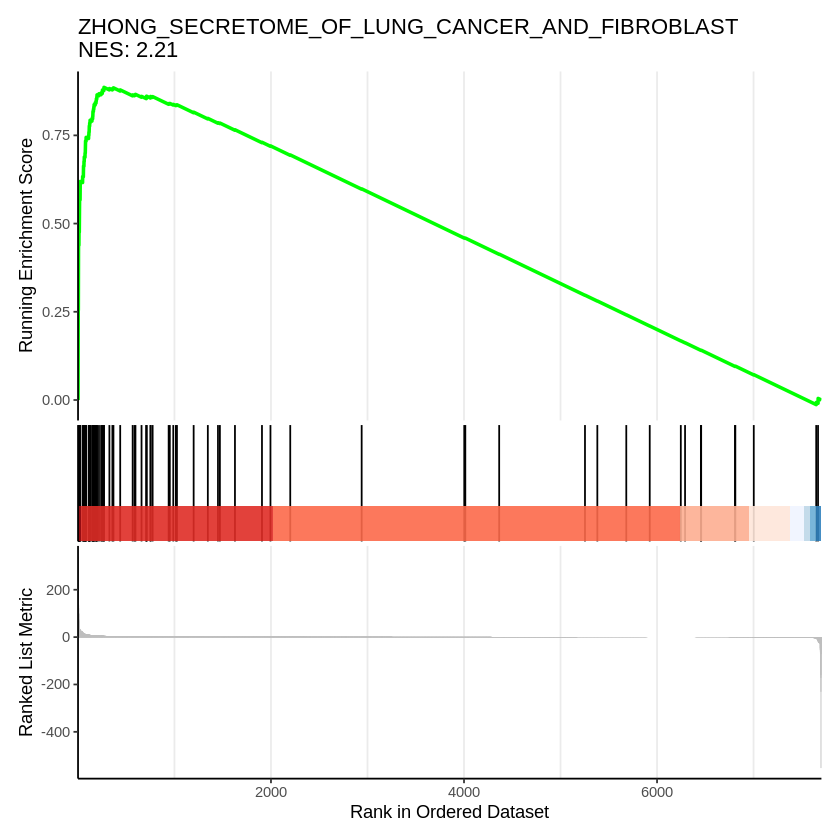

In [26]:
# 找到L2FC最大的pathway
max_l2fc_pathway <- filtered_results@result[filtered_results$Description == 'ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST', ]

# 找到L2FC最小的pathway
min_l2fc_pathway <- filtered_results@result[which.min(filtered_results$NES), ]

# 绘制L2FC最大的pathway的GSEA图
p1 <- gseaplot2(
  filtered_results,
  geneSetID = max_l2fc_pathway$ID,
  title = paste(max_l2fc_pathway$Description, "\nNES:", round(max_l2fc_pathway$NES, 2)),
  color = "green"
)
print(p1)
ggsave("./enrichment_carcinoma_fibro.pdf", plot = p1, width = 7, height = 4)

In [12]:
# 使用grep筛选包含特定关键词的通路
filtered_results <- gsea_result
filtered_results@result <- gsea_result@result %>%
  filter(grepl("COLLAGEN", Description, ignore.case = TRUE))
filtered_results@result

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NABA_COLLAGENS,NABA_COLLAGENS,NABA_COLLAGENS,22,0.8058213,1.812364,0.008988324,0.1088693,0.09332374,416,"tags=36%, list=5%, signal=34%",Col1a1/Col1a2/Col11a1/Col3a1/Col5a2/Col5a1/Col8a1/Col6a3
REACTOME_COLLAGEN_CHAIN_TRIMERIZATION,REACTOME_COLLAGEN_CHAIN_TRIMERIZATION,REACTOME_COLLAGEN_CHAIN_TRIMERIZATION,22,0.8058213,1.812364,0.008988324,0.1088693,0.09332374,416,"tags=36%, list=5%, signal=34%",Col1a1/Col1a2/Col11a1/Col3a1/Col5a2/Col5a1/Col8a1/Col6a3
REACTOME_COLLAGEN_BIOSYNTHESIS_AND_MODIFYING_ENZYMES,REACTOME_COLLAGEN_BIOSYNTHESIS_AND_MODIFYING_ENZYMES,REACTOME_COLLAGEN_BIOSYNTHESIS_AND_MODIFYING_ENZYMES,35,0.7719808,1.805393,0.015913752,0.1427511,0.12236755,771,"tags=43%, list=10%, signal=39%",Col1a1/Col1a2/Col11a1/Col3a1/P4hb/Serpinh1/Col5a2/Col5a1/Bmp1/Col8a1/Col6a3/Pcolce/Col18a1/Col5a3/Plod2
WP_TYPE_I_COLLAGEN_SYNTHESIS_IN_THE_CONTEXT_OF_OSTEOGENESIS_IMPERFECTA,WP_TYPE_I_COLLAGEN_SYNTHESIS_IN_THE_CONTEXT_OF_OSTEOGENESIS_IMPERFECTA,WP_TYPE_I_COLLAGEN_SYNTHESIS_IN_THE_CONTEXT_OF_OSTEOGENESIS_IMPERFECTA,21,0.8141561,1.808975,0.017283467,0.1511469,0.12956454,516,"tags=38%, list=7%, signal=36%",Col1a1/Col1a2/P4hb/Serpinh1/Bmp1/Serpinf1/Fzd1/Lox
REACTOME_CROSSLINKING_OF_COLLAGEN_FIBRILS,REACTOME_CROSSLINKING_OF_COLLAGEN_FIBRILS,REACTOME_CROSSLINKING_OF_COLLAGEN_FIBRILS,14,0.7888114,1.667513,0.029732648,0.2306499,0.19771519,524,"tags=43%, list=7%, signal=40%",Col1a1/Col1a2/Bmp1/Loxl2/Lox/Pcolce
REACTOME_COLLAGEN_FORMATION,REACTOME_COLLAGEN_FORMATION,REACTOME_COLLAGEN_FORMATION,55,0.6945682,1.682591,0.043269231,0.2555032,0.21901967,771,"tags=38%, list=10%, signal=35%",Col1a1/Col1a2/Col11a1/Col3a1/P4hb/Serpinh1/Col5a2/Ctsl/Col5a1/Bmp1/Loxl2/Col8a1/Col6a3/Itgb4/Lox/Pcolce/Lamc2/Itga6/Col18a1/Col5a3/Plod2
REACTOME_ASSEMBLY_OF_COLLAGEN_FIBRILS_AND_OTHER_MULTIMERIC_STRUCTURES,REACTOME_ASSEMBLY_OF_COLLAGEN_FIBRILS_AND_OTHER_MULTIMERIC_STRUCTURES,REACTOME_ASSEMBLY_OF_COLLAGEN_FIBRILS_AND_OTHER_MULTIMERIC_STRUCTURES,42,0.7141536,1.696743,0.045728039,0.2582784,0.22139867,561,"tags=38%, list=7%, signal=36%",Col1a1/Col1a2/Col11a1/Col3a1/Col5a2/Ctsl/Col5a1/Bmp1/Loxl2/Col8a1/Col6a3/Itgb4/Lox/Pcolce/Lamc2/Itga6
REACTOME_COLLAGEN_DEGRADATION,REACTOME_COLLAGEN_DEGRADATION,REACTOME_COLLAGEN_DEGRADATION,41,0.6991286,1.655529,0.051744886,0.2722912,0.23341055,737,"tags=34%, list=10%, signal=31%",Col1a1/Col1a2/Col11a1/Col3a1/Col5a2/Ctsl/Col5a1/Col8a1/Col6a3/Adam9/Mmp2/Furin/Col18a1/Col5a3
OSWALD_HEMATOPOIETIC_STEM_CELL_IN_COLLAGEN_GEL_UP,OSWALD_HEMATOPOIETIC_STEM_CELL_IN_COLLAGEN_GEL_UP,OSWALD_HEMATOPOIETIC_STEM_CELL_IN_COLLAGEN_GEL_UP,142,0.4877410,1.264909,0.153012048,0.3981301,0.34128084,1947,"tags=37%, list=25%, signal=28%",H3f3b/Cd44/Hnrnpa1/Ctsl/F3/Mcl1/Akr1c18/Slc12a2/Junb/Cd14/Nap1l1/Fus/Zfp36l1/Flnc/Klf6/Fbn1/Il6/Klf4/Pafah1b2/Hnrnpdl/Serpinb2/Ier2/Kpnb1/Ptgs2/Arl4c/Cxcl3/Runx1/Tnfaip6/Trem1/Mapk3/Tfap2a/Il1b/Nrep/Ets2/Areg/Gatad2a/Acsm3/Col15a1/Slc7a1/Fosb/Ahcyl1/Il1r2/Cyp1b1/Tnfaip3/Egr1/Sf3a3/Fos/Ctnnbl1/Il1a/Nfkbia/Rab5c/Pkp4/Kdm4b


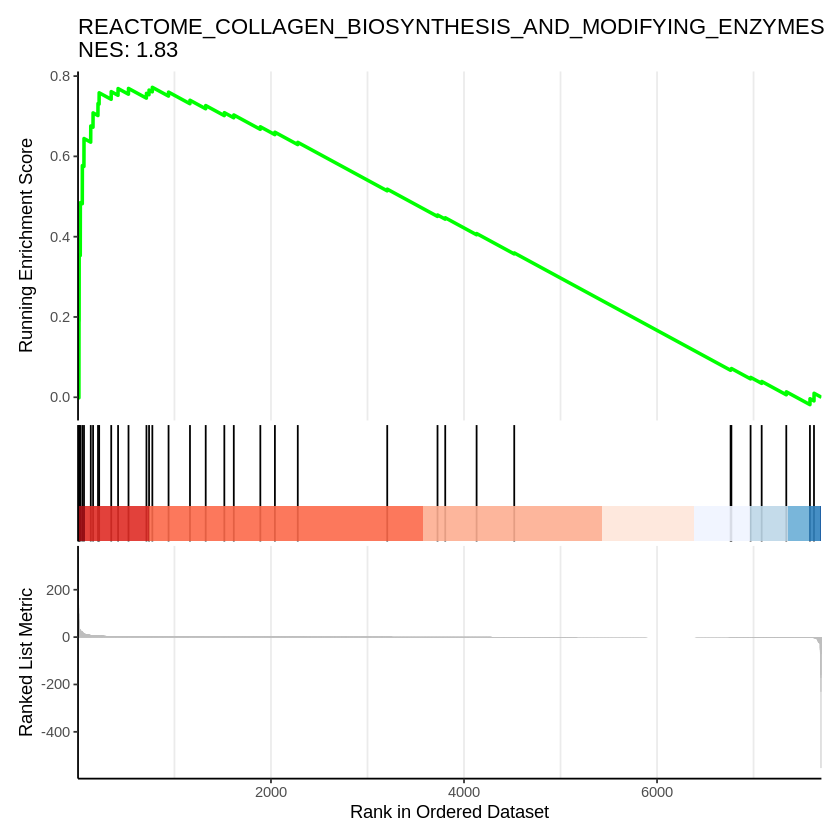

In [28]:
# 找到L2FC最大的pathway
max_l2fc_pathway <- filtered_results@result[filtered_results$Description == 'REACTOME_COLLAGEN_BIOSYNTHESIS_AND_MODIFYING_ENZYMES', ]

# 找到L2FC最小的pathway
min_l2fc_pathway <- filtered_results@result[which.min(filtered_results$NES), ]

# 绘制L2FC最大的pathway的GSEA图
p1 <- gseaplot2(
  filtered_results,
  geneSetID = max_l2fc_pathway$ID,
  title = paste(max_l2fc_pathway$Description, "\nNES:", round(max_l2fc_pathway$NES, 2)),
  color = "green"
)
print(p1)
ggsave("./enrichment_collagen.pdf", plot = p1, width = 7, height = 4)

In [ ]:
library(tidyverse)
library(clusterProfiler)
library(org.Mm.eg.db)
library(enrichplot)
library(msigdbr)

# 读取基因表达数据
setwd(dir = '/home/wpy/stereoseq/20240822-Pipeline/')
gene_data <- read.csv("rank_genes_groups_1.csv")

# 创建基因列表,按照log2fc排序
gene_list <- gene_data$logfoldchanges
names(gene_list) <- gene_data$names
gene_list <- sort(gene_list, decreasing = TRUE)

# 移除NA值和重复值
gene_list <- gene_list[!is.na(gene_list)]
gene_list <- gene_list[!duplicated(gene_list)]

go_bp <- enrichGO(gene = names(gene_list) %>% head(50),
                  OrgDb = org.Mm.eg.db,
                  keyType = 'SYMBOL',
                  ont = "BP",
                  pAdjustMethod = "BH",
                  pvalueCutoff = 0.05,
                  qvalueCutoff = 0.05)
go_bp <- gofilter(go_bp, level = 5)

# 手动设定p.adjust的color map区间
p_adjust_colors <- c("red", "yellow", "green")
p_adjust_breaks <- c(0, 0.01, 0.05, 1)

# 绘制点图
p <- barplot(go_bp,
            showCategory = 15,
            x = "GeneRatio",
            color = "p.adjust",
            title = "GO Biological Process Enrichment",
            colorPalette = p_adjust_colors,
            colorBreaks = p_adjust_breaks)

print(p)
ggsave("./enrichment_dotplot_1.pdf", plot = p, width = 8, height = 10)

: 

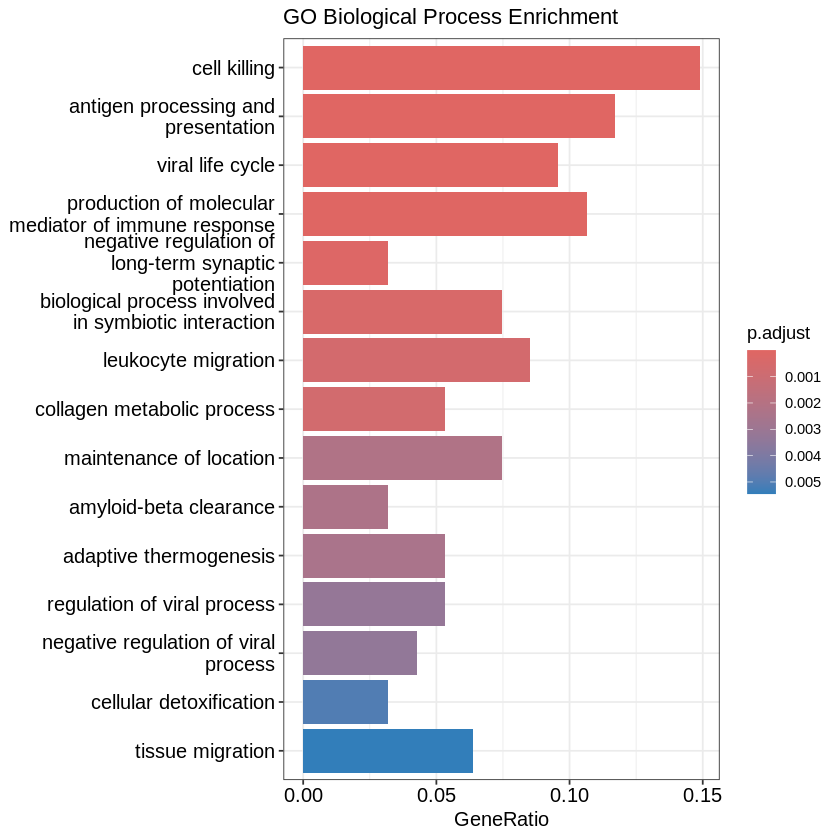

In [8]:
library(tidyverse)
library(clusterProfiler)
# library(org.Mm.eg.db)
library(enrichplot)
library(msigdbr)

# 读取基因表达数据
setwd(dir = '/home/wpy/stereoseq/20240822-Pipeline/')
gene_data <- read.csv("rank_genes_groups_0.csv")

# 创建基因列表,按照log2fc排序
gene_list <- gene_data$logfoldchanges
names(gene_list) <- gene_data$names
gene_list <- sort(gene_list, decreasing = TRUE)

# 移除NA值和重复值
gene_list <- gene_list[!is.na(gene_list)]
gene_list <- gene_list[!duplicated(gene_list)]

# 进行GO:BP富集分析
library(org.Mm.eg.db)
go_bp <- enrichGO(gene = names(gene_list) %>% head(100),
                  OrgDb = org.Mm.eg.db,
                  keyType = 'SYMBOL',
                  ont = "BP",
                  pAdjustMethod = "BH",
                  pvalueCutoff = 0.05,
                  qvalueCutoff = 0.05)
go_bp <- gofilter(go_bp, level = 3)
# 绘制点图
p <- barplot(go_bp,
            showCategory = 15,
            x = "GeneRatio",
            color = "p.adjust",
            title = "GO Biological Process Enrichment")

print(p)
ggsave("./enrichment_dotplot_0.pdf", plot = p, width = 8, height = 10)

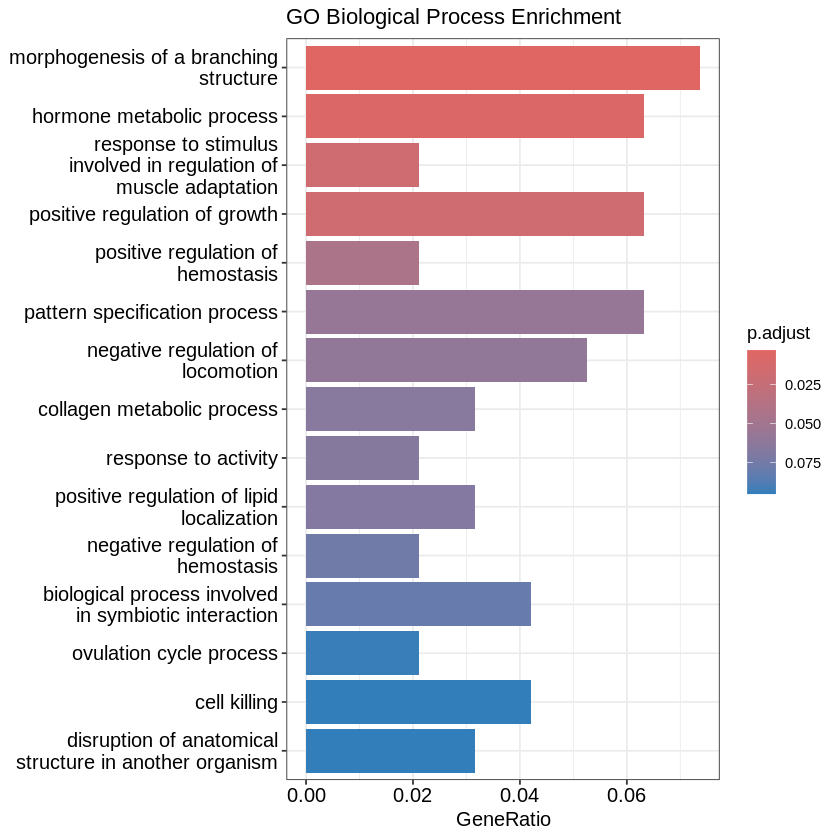

In [9]:
library(tidyverse)
library(clusterProfiler)
# library(org.Mm.eg.db)
library(enrichplot)
library(msigdbr)

# 读取基因表达数据
setwd(dir = '/home/wpy/stereoseq/20240822-Pipeline/')
gene_data <- read.csv("rank_genes_groups_2.csv")

# 创建基因列表,按照log2fc排序
gene_list <- gene_data$logfoldchanges
names(gene_list) <- gene_data$names
gene_list <- sort(gene_list, decreasing = TRUE)

# 移除NA值和重复值
gene_list <- gene_list[!is.na(gene_list)]
gene_list <- gene_list[!duplicated(gene_list)]

# 进行GO:BP富集分析
library(org.Mm.eg.db)
go_bp <- enrichGO(gene = names(gene_list) %>% head(100),
                  OrgDb = org.Mm.eg.db,
                  keyType = 'SYMBOL',
                  ont = "BP",
                  pAdjustMethod = "BH",
                  pvalueCutoff = 0.1,
                  qvalueCutoff = 0.1)
go_bp <- gofilter(go_bp, level = 3)
# 绘制点图
p <- barplot(go_bp,
            showCategory = 30,
            x = "GeneRatio",
            color = "p.adjust",
            title = "GO Biological Process Enrichment")

print(p)
ggsave("./enrichment_dotplot_2.pdf", plot = p, width = 8, height = 20)

In [24]:
go_bp <- enrichGO(gene = names(gene_list) %>% head(200),
                  OrgDb = org.Mm.eg.db,
                  keyType = 'SYMBOL',
                  ont = "BP",
                  pAdjustMethod = "BH",
                  pvalueCutoff = 0.1,
                  qvalueCutoff = 0.1)
go_bp@result

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0051924,GO:0051924,regulation of calcium ion transport,14/190,296/28891,1.156243e-08,0.0000179512,1.379936e-05,F2/Agt/Stc2/Serpine1/Capn3/Nol3/Agtr1a/Rgs4/Stc1/Trpc6/Adrb2/Dysf/Jak3/Gnao1,14
GO:0010959,GO:0010959,regulation of metal ion transport,17/190,461/28891,1.236735e-08,0.0000179512,1.379936e-05,Actn2/F2/Agt/Stc2/Serpine1/Kcnab3/Capn3/Nol3/Gal/Agtr1a/Rgs4/Stc1/Trpc6/Adrb2/Dysf/Jak3/Gnao1,17
GO:0006816,GO:0006816,calcium ion transport,15/190,469/28891,5.656693e-07,0.0005473793,4.207785e-04,F2/Agt/Stc2/Serpine1/Capn3/Nol3/Agtr1a/Epm2a/Rgs4/Stc1/Trpc6/Adrb2/Dysf/Jak3/Gnao1,15
GO:0007204,GO:0007204,positive regulation of cytosolic calcium ion concentration,10/190,202/28891,9.964953e-07,0.0007232065,5.559395e-04,Agt/Epor/Npff/Esr1/Ccl28/Agtr1a/Ackr2/Gata2/Trpc6/Jak3,10
GO:0008016,GO:0008016,regulation of heart contraction,9/190,197/28891,6.734232e-06,0.0026080613,2.004855e-03,Agt/Npff/Slc4a3/Rgs4/Stc1/Apln/Adrb2/Gnao1/Tnf,9
GO:0060993,GO:0060993,kidney morphogenesis,7/190,107/28891,7.132402e-06,0.0026080613,2.004855e-03,Cited1/Agt/Nphp3/Tcf21/Greb1l/Agtr1a/Fmn1,7
GO:0003015,GO:0003015,heart process,10/190,252/28891,7.176295e-06,0.0026080613,2.004855e-03,Agt/Npff/Slc4a3/Rgs4/Nox4/Stc1/Apln/Adrb2/Gnao1/Tnf,10
GO:0051928,GO:0051928,positive regulation of calcium ion transport,8/190,151/28891,7.518264e-06,0.0026080613,2.004855e-03,F2/Serpine1/Capn3/Agtr1a/Stc1/Trpc6/Adrb2/Jak3,8
GO:2000846,GO:2000846,regulation of corticosteroid hormone secretion,4/190,20/28891,8.085619e-06,0.0026080613,2.004855e-03,Agt/Ecrg4/Gal/Agtr1a,4
